# **Chapter 12**  
**┗ 신용점수 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* 문제해결 프로세스 정의
* 🥉Session 1 - 「신용점수 분포 파악」
* 🥈Session 2 - 「신용점수 영향인자 분석」
* 🥇Session 3 - 「ML 활용 신용점수 예측」

In [1]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter12')
# '/content/drive/MyDrive/Colab Notebooks/ ← 여기 경로까지는 본인의 경로 입력, part3_lecture_fastcampus/chapter12' ← 변경X
os.getcwd()

Mounted at /content/drive


'/content/drive/MyDrive/Colab Notebooks/part3_lecture_fastcampus/chapter12'

## **문제상황 및 데이터 살펴보기**
---
> **시나리오** 💯✅  (신용평가사)

```
A사는 매 년 다른 신용평가사의 신용점수 Data를 구입하여 사용하고 있다. 해당 Data를 사용함에 따라 발생하는 라이센스 비용이 만만치 않다.  
따라서 A사는 이번 년도 신규프로젝트의 일환으로 자사의 Data를 활용하여 신용점수를 예측하는 모형을 만들고자 한다.

```  

> **데이터 살펴보기**

* 신용점수와 고객 프로필 정보
* 데이터 명세 ⬇

|Loan ID|Customer ID|Loan Status|Current Loan Amount|Term|Credit Score|
|:---:|:---:|:---:|:---:|:---:|:---:|
|대출ID|고객ID|대출상태|현재대출잔액|대출기간|신용점수|
|Annual Income|Years in current job|Home Ownership|Purpose|Monthly Debt|Years of Credit History| 
|연수입|직업년차|자가여부|대출목적|월상환금액|신용기록|
|Months since last delinquent|Number of Open Accounts|Number of Credit Problems|Current Credit Balance|Maximum Open Credit|Bankruptcies|  
|마지막 연체이후 개월|유효계좌수|신용불량건수|현재신용한도|최대신용한도|파산여부|
|Tax Liens|
|세금유치권|

In [2]:
# ▶ Data read
import pandas as pd 
df = pd.read_csv('chapter12_credit_score.csv')
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328.0,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0



## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 신용평가 모델 부재로 인해 발생하는 과다한 라이센스 비용
```  

> **기대효과**

```
▶ 자사 신용평가 모델을 활용 라이센스 비용 절감 
```

> **해결방안**

```
▶ 자사 Data 활용 신용평가 모델 생성 및 활용
▶ Session 1 🥉
 - Data 전처리 및 distplot을 활용한 신용점수 분포 확인 
▶ Session 2 🥈
 - Numeric(연속형), Categorical(범주형) 변수별 평균 신용점수 확인 
▶ Session 3 🥇
 - ML 알고리즘을 활용하여 신용점수 예측 모델 생성
```

> **성과측정**  

```
▶ 매년 라이센스 비용 절감 금액
```

> **현업적용**  

```
▶ 매 월 Model에 Input하기 위한 Data mart 생성
▶ 매 월 Model을 활용하여 고객의 신용점수 산출 
▶ 모델 활용 신용점수와 외부업체 신용점수와의 정합성 확인
▶ 정합성 확인 후 자사 모델 활용 전환 논의
```

> **주요 코드 미리 살펴보기**  

```
▶ session 1 → dropna(subset=['']), fillna(0), drop_duplicates
▶ session 2 → pearsonr, groupby.mean()
▶ session 3 → list.remove(''), LabelEncoder(), mean_absolute_error, r2_score
```

## **🥉Session 1**  
**┗ 신용점수 분포 파악**  
---

### · Data 전처리  
---
* 수집된 데이터의 기본 정보들을 확인  

  (1) Data shape(형태) 확인 

  (2) Data type 확인

  (3) Null값 확인 (※ 빈 값의 Data)

  (4) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  


In [3]:
# ▶ Data 형태 확인
# ▶ 100,514 row, 19 col로 구성됨
print('df', df.shape)

df (100514, 19)


In [4]:
# ▶ Data type 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100514 entries, 0 to 100513
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       100000 non-null  object 
 1   Customer ID                   100000 non-null  object 
 2   Loan Status                   100000 non-null  object 
 3   Current Loan Amount           100000 non-null  float64
 4   Term                          100000 non-null  object 
 5   Credit Score                  80846 non-null   float64
 6   Annual Income                 80846 non-null   float64
 7   Years in current job          95778 non-null   object 
 8   Home Ownership                100000 non-null  object 
 9   Purpose                       100000 non-null  object 
 10  Monthly Debt                  100000 non-null  float64
 11  Years of Credit History       100000 non-null  float64
 12  Months since last delinquent  46859 non-null

In [5]:
# ▶ Null 값 확인
print(df.isnull().sum())

Loan ID                           514
Customer ID                       514
Loan Status                       514
Current Loan Amount               514
Term                              514
Credit Score                    19668
Annual Income                   19668
Years in current job             4736
Home Ownership                    514
Purpose                           514
Monthly Debt                      514
Years of Credit History           514
Months since last delinquent    53655
Number of Open Accounts           514
Number of Credit Problems         514
Current Credit Balance            514
Maximum Open Credit               516
Bankruptcies                      718
Tax Liens                         524
dtype: int64


In [6]:
# ▶ Target data는 신용점수(Credit Score)가 없는 데이터는 활용할 수 없으므로 제거
df=df.dropna(subset=['Credit Score','Years in current job', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']) 
df['Months since last delinquent'].fillna(0.0, inplace=True)

In [7]:
# ▶ 재확인
print(df.isnull().sum())

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Annual Income                   0
Years in current job            0
Home Ownership                  0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64


In [8]:
# ▶ 고객 ID 기준 중복 확인 
df[df['Customer ID']=='981165ec-3274-42f5-a3b4-d104041a9ca9']

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
38854,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0


In [9]:
# ▶ 고객 ID 기준 중복 제거
df.drop_duplicates(['Customer ID'], keep = 'first', inplace=True)

In [10]:
df.shape

(64055, 19)

### · 신용점수 분포 확인
---  


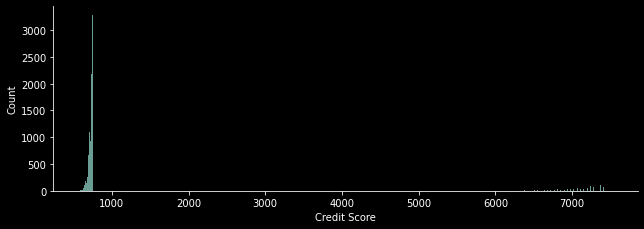

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

In [12]:
df['Credit Score'].describe()

count    64055.000000
mean      1148.426196
std       1599.706075
min        585.000000
25%        710.000000
50%        730.000000
75%        743.000000
max       7510.000000
Name: Credit Score, dtype: float64

In [13]:
# ▶ 신용점수가 1,000점 만점으로 가정했을때, 그 이상의 데이터는 오류가 있는 Data일 확률이 높다. 제거한다.
df = df[df['Credit Score']<=1000]
df.shape

(59761, 19)

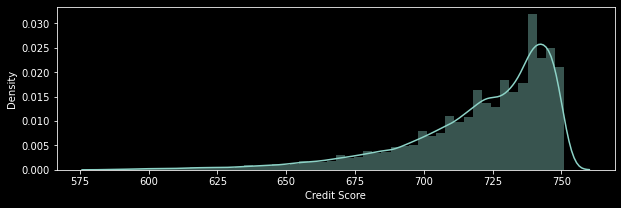

In [14]:
# ▶ 전처리 후 정사 데이터 분포 확인
sns.distplot(df['Credit Score'])
plt.gcf().set_size_inches(10, 3)

## **🥈Session 2**  
**┗ 신용점수 영향인자 분석**  
---

In [15]:
# ▶ numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']
numeric_list : ['Current Loan Amount', 'Credit Score', 'Annual Income', 'Monthly Debt', 'Years of Credit History', 'Months since last delinquent', 'Number of Open Accounts', 'Number of Credit Problems', 'Current Credit Balance', 'Maximum Open Credit', 'Bankruptcies', 'Tax Liens']



### · Numeric 변수 
---

In [16]:
df[numeric_list].head(3)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,445412.0,709.0,1167493.0,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0
2,99999999.0,741.0,2231892.0,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,347666.0,721.0,806949.0,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0


(0.08182908654881718, 2.611517364358156e-89)


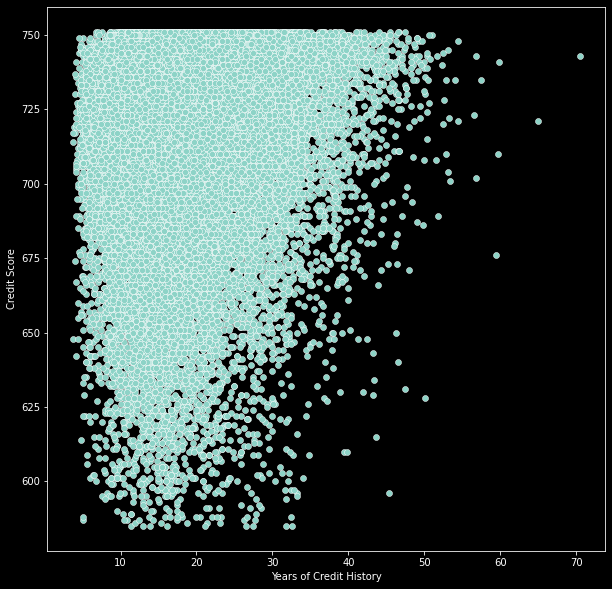

In [17]:
# ▶ Years of Credit History(신용기록)과 신용점수와의 상관계수 확인
import scipy.stats as stats
val='Years of Credit History'


sns.scatterplot(df[val], df['Credit Score']);
print(stats.pearsonr(df[val], df['Credit Score']))
plt.gcf().set_size_inches(10, 10)

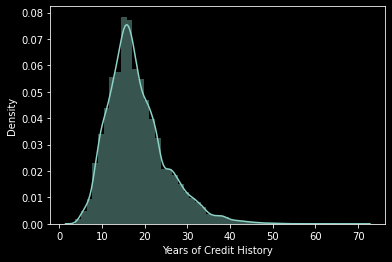

In [18]:
sns.distplot(df[val]);

In [19]:
# ▶ 구간화
import numpy as np
df['gp'] = np.where (df[val] <= 10, 1, 
                           np.where(df[val] <= 20, 2, 3))

df[[val,'gp']]

,Years of Credit History,gp
0,17.2,2
2,14.9,2
3,12.0,2
6,19.6,2
8,22.6,3
...,...,...
99990,20.1,3
99994,17.4,2
99996,9.4,1
99997,18.8,2


In [20]:
# ▶ 상관계수(0.08)에서 예상할 수 있었다시피, 큰 차이점이 없음
df.groupby('gp')['Credit Score'].mean()

gp
1    714.098887
2    719.841905
3    722.612636
Name: Credit Score, dtype: float64

### · Categorical 변수 
---

In [21]:
df[categoical_list].iloc[:, 2:].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
0,Fully Paid,Short Term,8 years,Home Mortgage,Home Improvements
2,Fully Paid,Short Term,8 years,Own Home,Debt Consolidation
3,Fully Paid,Long Term,3 years,Own Home,Debt Consolidation


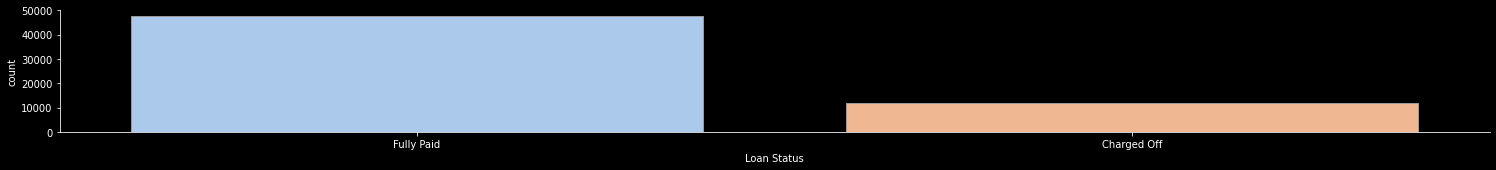

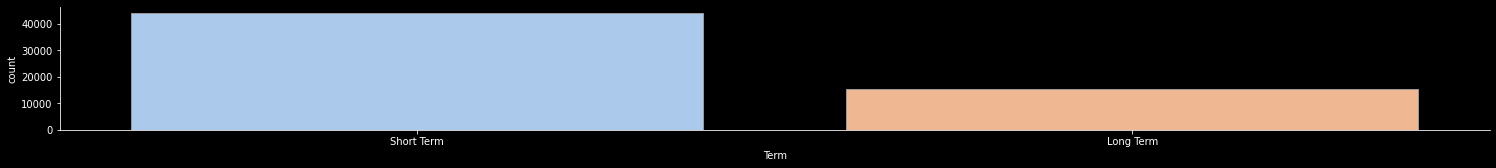

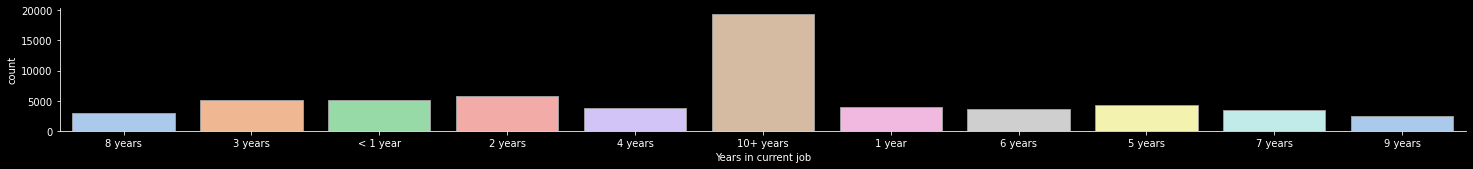

In [22]:
# ▶ 범주형 변수에 대해 Catplot 
sns.catplot(x="Loan Status", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 2)

sns.catplot(x="Term", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 2)

sns.catplot(x="Years in current job", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 2)

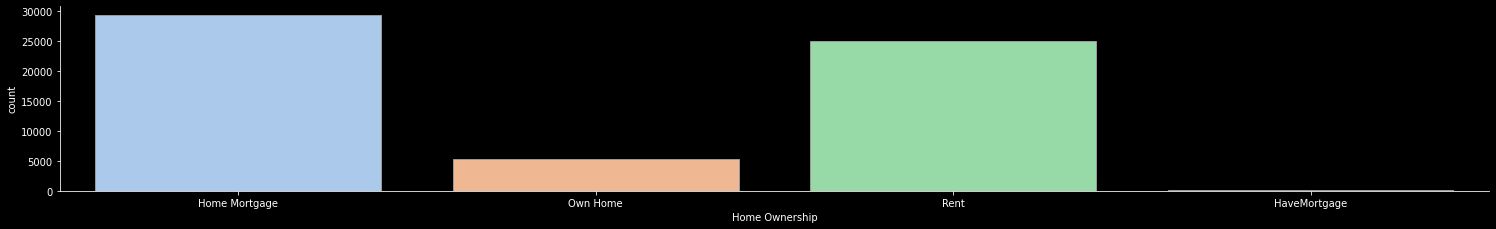

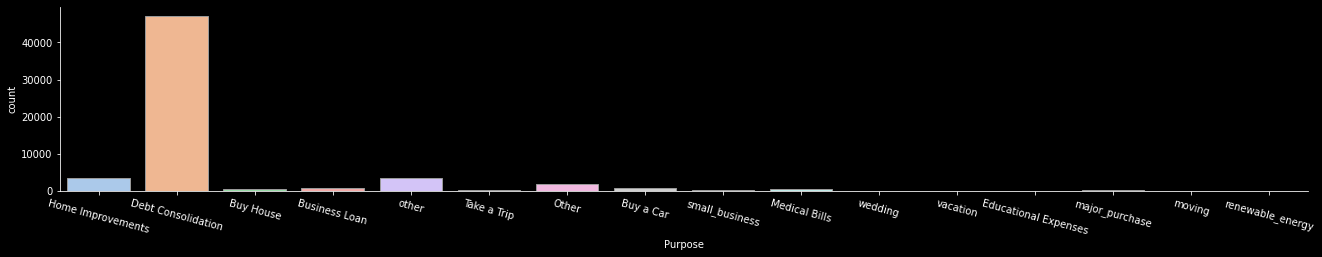

In [23]:
sns.catplot(x="Home Ownership", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

sns.catplot(x="Purpose", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.xticks(rotation=-15)
plt.gcf().set_size_inches(25, 3)

In [24]:
# ▶ 범주형 변수 list
print(categoical_list)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [25]:
# ▶ Loan ID와 Customer ID는 구분자이기 때문에 제거
categoical_list[2:]

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']

In [27]:
for i in categoical_list[2:] :
  print(df.groupby(i)['Credit Score'].mean().sort_values(ascending=False))
  print('')
  print('-------------------------------------')

Loan Status
Fully Paid     722.800443
Charged Off    709.825839
Name: Credit Score, dtype: float64

-------------------------------------
Term
Short Term    728.125189
Long Term     697.727308
Name: Credit Score, dtype: float64

-------------------------------------
Years in current job
1 year       721.161307
< 1 year     720.933871
2 years      720.796908
3 years      720.536819
4 years      720.517060
8 years      720.314365
6 years      720.281515
5 years      720.247259
7 years      719.727642
9 years      719.636364
10+ years    719.634629
Name: Credit Score, dtype: float64

-------------------------------------
Home Ownership
Home Mortgage    721.693731
HaveMortgage     720.576923
Own Home         719.113319
Rent             718.706197
Name: Credit Score, dtype: float64

-------------------------------------
Purpose
Buy a Car               728.040201
major_purchase          725.208333
Educational Expenses    724.844828
Home Improvements       721.773272
Debt Consolidation      7

## **🥇Session 3**  
**┗ ML 활용 신용점수 예측**  
---

### · 모델링을 위한 데이터 준비
---
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할

In [ ]:
df.head(3)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,gp
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412.0,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,0.0,6.0,1.0,228190.0,416746.0,1.0,0.0,1
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999.0,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0,3
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666.0,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,0.0,9.0,0.0,256329.0,386958.0,0.0,0.0,1


In [ ]:
# ▶ 모델링을 학습하기 위한 Fearue(X)와 Y데이터를 구분하는 단계
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

X=df.drop(['Loan ID', 'Customer ID', 'gp', 'Credit Score'], axis=1)
Y=df['Credit Score']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(41832, 16)
(41832,)
(17929, 16)
(17929,)


In [ ]:
print(categoical_list)

['Loan ID', 'Customer ID', 'Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [ ]:
# ▶ 사용하지 않을 list는 사전 제거
categoical_list.remove('Loan ID')
categoical_list.remove('Customer ID')

In [ ]:
print(categoical_list)

['Loan Status', 'Term', 'Years in current job', 'Home Ownership', 'Purpose']


In [ ]:
from sklearn.preprocessing import LabelEncoder

for col in categoical_list:
    print(col, " - completed")
    le = LabelEncoder()
    le.fit(list(x_train[col].values) + list(x_test[col].values))
    x_train[col] = le.transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

Loan Status  - completed
Term  - completed
Years in current job  - completed
Home Ownership  - completed
Purpose  - completed


In [ ]:
x_train[categoical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
23650,1,1,5,1,7
25071,1,1,0,3,6
1411,1,1,2,3,3


In [ ]:
x_train[categoical_list].head(3)

,Loan Status,Term,Years in current job,Home Ownership,Purpose
23650,1,1,5,1,7
25071,1,1,0,3,6
1411,1,1,2,3,3


### · 모델 학습 및 평가
---
* 모델을 학습하고 예측을 수행하여 성능을 평가

In [ ]:
# ▶ 학습
rfr = RandomForestRegressor(n_estimators=100, max_depth=12)
rfr.fit(x_train, y_train)

RandomForestRegressor(max_depth=12)

In [ ]:
# ▶ 예측
# ▶ 예측은 학습에 사용된 Data와 Test Data 모두 예측하고 평가함(※ 과적합 여부 판별)
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score
y_pred_train = rfr.predict(x_train)
y_pred_test = rfr.predict(x_test)


mae_train = mean_absolute_error(y_train, y_pred_train)
print('mae_train(mae): ', mae_train)
r2_train = r2_score(y_train, y_pred_train)
print('r2_score(r2): ', r2_train)
print('')
mae_test = mean_absolute_error(y_test, y_pred_test)
print('mae_test(mae): ', mae_test)
r2_test = r2_score(y_test, y_pred_test)
print('r2_score(r2): ', r2_test)

mae_train(mae):  13.296759873501598
r2_score(r2):  0.5988542386980557

mae_test(mae):  15.932828197796788
r2_score(r2):  0.38926031731433


In [ ]:
# ▶ 예측값과 실제값 비교 
result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
25266,730.0,714.881710,15.118290
26125,702.0,719.044824,-17.044824
10745,749.0,736.120791,12.879209
77928,664.0,693.793449,-29.793449
26519,705.0,711.280850,-6.280850
...,...,...,...
91626,750.0,735.520519,14.479481
18144,724.0,712.971069,11.028931
10816,713.0,722.544704,-9.544704
30346,722.0,724.765122,-2.765122


In [ ]:
result.sort_values(by=['diff'], ascending = False)

,Real Values,Predicted Values,diff
36560,728.0,656.846953,71.153047
56445,733.0,668.387121,64.612879
86150,746.0,687.501996,58.498004
20961,735.0,676.504903,58.495097
16422,737.0,679.475064,57.524936
...,...,...,...
17265,600.0,723.664186,-123.664186
24322,589.0,716.220423,-127.220423
47192,590.0,725.911183,-135.911183
47762,591.0,732.401430,-141.401430


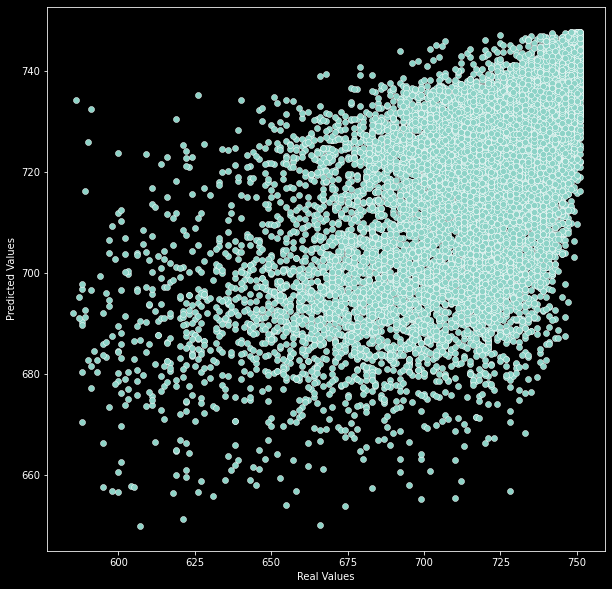

In [ ]:
# ▶ 신용점수가 낮을수록 Fitting이 잘 않되는 경향성이 보임
sns.scatterplot(result['Real Values'], result['Predicted Values'])
plt.gcf().set_size_inches(10 ,10)

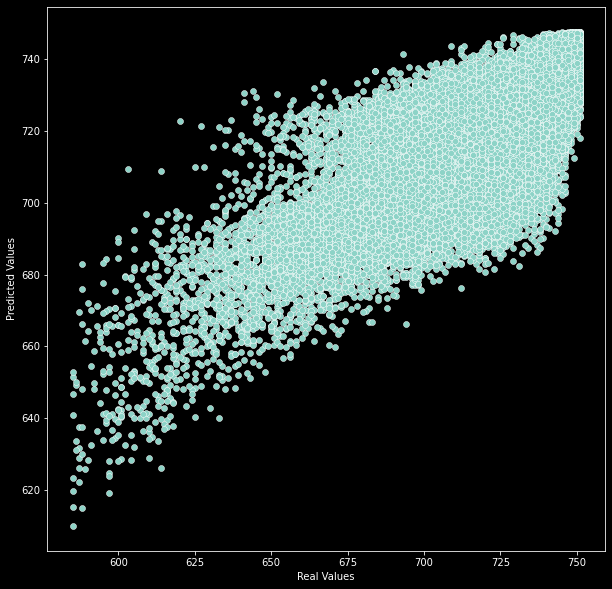

In [ ]:
# ▶ Train set에서는 잘 Fitting 되어있음
result = pd.DataFrame({'Real Values':y_train, 'Predicted Values':y_pred_train})
sns.scatterplot(result['Real Values'], result['Predicted Values'])
plt.gcf().set_size_inches(10 ,10)

### · 중요 변수 파악
---
* Feature IMP 분석을 통한 중요변수 파악

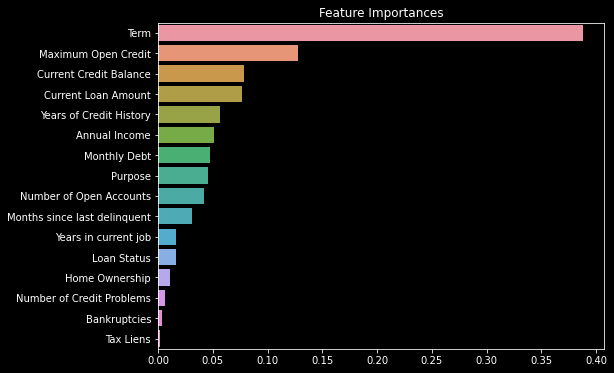

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

ftr_importances_values = rfr.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = x_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

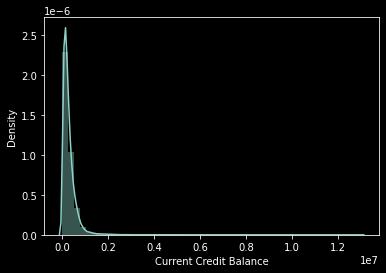

In [29]:
sns.distplot(df['Current Credit Balance'])

In [30]:
df['Current Credit Balance'].describe()

count    5.976100e+04
mean     2.964889e+05
std      3.616377e+05
min      0.000000e+00
25%      1.143040e+05
50%      2.121540e+05
75%      3.702150e+05
max      1.298696e+07
Name: Current Credit Balance, dtype: float64

In [31]:
# ▶ 구간화
val = 'Current Credit Balance'

import numpy as np
df['gp'] = np.where (df[val] <= 1143045, 1, 
                           np.where(df[val] <= 370215, 2, 3))

df[[val,'gp']]

,Current Credit Balance,gp
0,228190.0,1
2,297996.0,1
3,256329.0,1
6,122170.0,1
8,437171.0,1
...,...,...
99990,37392.0,1
99994,456.0,1
99996,153045.0,1
99997,109554.0,1


In [32]:
# ▶ 중요변수 'Current Credit Balance'에 대한 상세 탐색
df.groupby('gp')['Credit Score'].mean().sort_values(ascending = False)

gp
1    720.218991
3    719.886695
Name: Credit Score, dtype: float64

### · 모델 Save and Read
---
* 최종 모델을 저장 및 다시 불러오기

In [ ]:
import pickle
# 모델 저장
saved_model = pickle.dumps(rfr)

# 모델 Read
rfr_from_pickle = pickle.loads(saved_model)